# BAIT 509 Assignment 1

__Evaluates__: Class meetings 01, 02, and 03. 

__Due__: Wednesday, March 7 at 10:00am (i.e., the start of Class Meeting 04).

__Attribution__: Many of these exercises are adapted from Michael Gelbart's DSCI 571 exercises and Mark Schmidt's CPSC 340 exercises.

## Instructions

- You must use proper spelling and grammar.
- Add your responses to the questions in this very jupyter notebook. 
- Submit your assignment through [UBC Connect](https://connect.ubc.ca/) by the deadline, being sure to upload your jupyter notebook file.

## Exercise 1: $k$-NN Fundamentals


Here we will try classification of the famous handwritten digits data set. 

This data set exists in many forms; we will use the one bundled in `sklearn.datasets`. We will also use `sklearn` for classification.

Load the data:

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import random
%matplotlib inline

digits = datasets.load_digits()

You can check out the documentation for the data by running `print(digits['DESCR'])`. We'll extract the features and labels for you:

In [2]:
X = digits['data'] # this is the data with each 8x8 image "flattened" into a length-64 vector.
Y = digits['target'] # these are the labels (0-9).

Here's a plot of a random example:

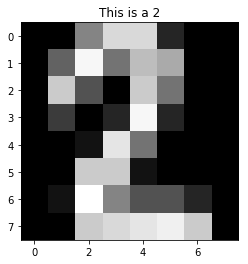

In [3]:
idx = random.randint(0, digits['images'].shape[0]-1) 
plt.imshow(digits['images'][idx], cmap='Greys_r')
plt.title('This is a %d' % digits['target'][idx])

### 1(a) Fundamentals


1. How many features are there, and what are they?
2. Which is closer to element 0 (`X[0]`) -- element 1 (`X[1]`) or element 2 (`X[2]`)? Report the two distances (Euclidean).
3. Using the above information, if only elements 1 and 2 are used in a $k$-NN classifier with $k=1$, what would element 0 be classified as, and why?

### 1(b) Investigating error

You'll be using the scikit-learn implementation of the $k$-NN classifier. Documentation is available at http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html.

Using `k=10`, fit a $k$-NN classifier using `X` and `Y` using all of the data as your training data. Obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? This is called the _error rate_.    
2. Choose one case that was not predicted correctly. What was predicted, and what is the correct label? Plot the image, and comment on why you think the classifier made a mistake. 



### 1(c) One Nearest Neighbour error

Now fit the classifier using `k=1`, using all of your data as training data, and again obtain predictions from `X`. 

1. What proportion of these predictions are incorrect? Briefly explain why this error rate is achieved (in one or two sentences; think about how the $k$-NN algorithm works).    
2. With the above error rate in mind, if I give you a new handwritten digit (not in the data set), will the classifier _for sure_ predict the label correctly? Briefly explain why or why not.

## Exercise 2: Investigating $k$-NN Error

This is a continuation of Exercise 1. Each part asks you to investigate some scenario.

__Note__: For this specific data set, you might not be able to overfit with $k$-NN! So don't worry if you can't find an example of overfitting.

### 2(a) The influence of k

Now, split the data into _training_ and _test_ sets. You can choose any reasonable fraction for training vs. testing (50% will do). 

__Note__: It's always a good idea to randomly shuffle the data before splitting, in case the data comes ordered in some way. (For example, if they are ordered by label, then your training set will be all the digits 0-4, and your test set all the digits 5-9, which would be bad... you might end up with 100% error!!) To shuffle your data, you can use [`numpy.random.shuffle`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.shuffle.html).

For various values of $k$, fit (a.k.a. _train_) a classifier using the training data. Use that classifier to obtain an error rate when predicting on both the training and test sets, for each $k$. How do the training error and test error change with $k$? Make a plot to show the trends, and briefly comment on the insights that this plot yields.

### 2(b) Fundamental Tradeoff
rubric={reasoning:5}

Recall the two parts of the fundamental trade-off in machine learning:

1. How small we can make the training error.
2. How well the training error approximates the test error.

In a $k$-nearest neighbour classifier, how does the parameter $k$ affect each of the two parts of the trade-off? What is one way that we could choose $k$ in practice?

### 2(c) The influence of data partition

rubric={reasoning:5}

Now, choose your favourite value of $k$, but vary the proportion of data reserved for the training set, again obtaining training and test error rates for each partition of the data. Plot training and test error (on the same axes) vs. the proportion of training examples. Briefly comment on the insights that this plot yields.

### 2(d) Imbalanced training data

rubric={reasoning:5, code:5}

Now, take a subset of your training data so that you only retain the first 2% of the examples of digits 0-8, but keep 100% of the 9's. This is called an imbalanced training set. 

What is your training and test error, vs. $k$? How does it compare to your performance with all the data?

### 2(e) Imbalanced training data -- fair (Optional)

What we did in (d) above was an unfair comparison, because reducing the amount of training data will generally hurt performance. To compare, randomly remove examples from the original training set such that the number of examples is the same as in part (d) above. Now compare the training and test error to the results from (d). Briefly comment on the results. 

### 2(f) The influence of added noise (Optional; no marks)

__This question is worth no marks.__

Now, add noise to the training data: for each example, with probability 20% replace the training label with a label selected uniformly at random. Remake the plot vs. $k$. What do you observe? Is there a generalizable insight here?

## 3 Loess

We'll use the Titanic data set to try and predict survival of passengers (`Survival`) from `Age`, `Fare`, and `Sex`, using loess. You might find it useful to log-transform `Fare`. The data have been split into a training and test set in the files `titanic_train.csv` and `titanic_test.csv` in the `data` folder. Details of the data can be found at https://www.kaggle.com/c/titanic/data.

Note: To include `Sex` in your model, simply fit a loess model to each of `"male"` and `"female"`. 

Here are ways to implement loess in python and R:

- [sklearn.neighbors.RadiusNeighborsRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsRegressor.html#sklearn.neighbors.RadiusNeighborsRegressor) in python.
- [statsmodels.nonparametric.kernel_regression.KernelReg](http://www.statsmodels.org/stable/generated/statsmodels.nonparametric.kernel_regression.KernelReg.html) in python.
- [`loess`](https://stat.ethz.ch/R-manual/R-devel/library/stats/html/loess.html) function in R.
- [`ggplot2::geom_smooth`](http://ggplot2.tidyverse.org/reference/geom_smooth.html) for loess (and related methods) in R's `ggplot2` plotting package.

### 3(a) Scaling

Estimate the standard deviations of both (numeric) predictors. Is scaling your data justified? Does your decision also apply to $k$-NN, or is scaling only relevant for loess? If scaling is justified, proceed with scaling by subtracting the mean, then dividing by standard deviation (for each numeric predictor). 

__Hint:__ Be sure to do the same thing with the test set! Just make sure that the mean and standard deviation you use to do the scaling are of the _training_ set.

### 3(b) Missing Prediction

It's possible that loess won't predict anything for a certain observation on the test set. In what situation will this happen, and why? Could this also be the case for $k$-NN?

### 3(c) Regression

Fit a loess model to the training data for various values of the bandwidth parameter. Plot the mean squared error (MSE) on the training and test sets, and plot these across bandwidth. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what bandwidth is appropriate?

### 3(d) Classification

Like you just did, fit a loess model to the training data for various values of the bandwidth parameter, but then add a classification step: predict survival if the probability of survival is greater than 0.5. Plot the error rate on the training and test sets, and plot these across bandwidth. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what bandwidth is appropriate? Do you get similar results when you considered the MSE in the regression case above?

### 3(e) $k$-NN

Try the above classification exercise, but using $k$-NN. Plot the error rate on the training and test sets, and plot these across $k$. How does the training error curve differ from the training error curve, and why? From this plot, using the "validation set approach" for choosing hyperparameters, what $k$ is appropriate? How does the error compare with loess? Which would you choose, loess or $k$-NN?